# Pandas Tips and Tricks

#  01- How to find version

In [48]:
import pandas as pd
pd.__version__

'1.4.3'

In [49]:
#another way
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : e8093ba372f9adfe79439d90fe74b0b5b6dea9d6
python           : 3.10.5.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19044
machine          : AMD64
processor        : Intel64 Family 6 Model 61 Stepping 4, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_Pakistan.1252

pandas           : 1.4.3
numpy            : 1.23.0
pytz             : 2022.1
dateutil         : 2.8.2
setuptools       : 58.1.0
pip              : 22.1.2
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 3.1.2
IPython          : 8.4.0
pandas_datareader: None
bs4              : 4.11.1
bottleneck       : None
brotli       

# 02- Make a dataframe

DataFrame is a two_dimentional labeled data structure with columns of potentially different types.

let's first create a dataframe from a dictionary of equal lenght lists

In [50]:
df = pd.DataFrame({'A col': [1, 2, 3], 'B col': [4, 5, 6]})
df.head()

,A col,B col
0,1,4
1,2,5
2,3,6


In [51]:
# Create a DataFrame with numpy arrays
import numpy as np
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
pd.DataFrame(arr, columns=['A', 'B', 'C'])

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


Generating data from random numbers with columns names given as a list

In [52]:
pd.DataFrame(np.random.randn(4, 8), columns=list('ABCDEFGH'))

,A,B,C,D,E,F,G,H
0,-0.413094,2.147647,0.688576,-0.891281,-0.205911,1.125681,-0.373781,-1.412054
1,-1.185023,0.320945,-0.098304,-0.775529,-0.674093,-0.923481,0.145511,-0.292883
2,-0.117263,-1.563829,-1.186176,0.179946,-0.295243,-2.293896,-1.178642,0.683425
3,0.284598,-1.286218,-1.397656,0.829784,-0.322870,0.454266,0.763688,-1.322328


# 3- Rename columns

In [53]:
df.rename(columns={'A col': 'col_a', 'B col': 'col_b'}, inplace=True)
df.head()

,col_a,col_b
0,1,4
1,2,5
2,3,6


In [54]:
df.columns = ['col a1', 'col b1']
df.head()

,col a1,col b1
0,1,4
1,2,5
2,3,6


In [55]:
df.columns = df.columns.str.replace('col', ' column')
df.head()

,column a1,column b1
0,1,4
1,2,5
2,3,6


Prefix and Suffix can be added to all the columns using .add_prefix and .add_suffix

In [56]:
df = df.add_prefix('baba_')
df

,baba_ column a1,baba_ column b1
0,1,4
1,2,5
2,3,6


In [58]:
df.columns = ["col a2", "col b2"]
df

,col a2,col b2
0,1,4
1,2,5
2,3,6


# 04- Using template data

In [60]:
import pandas as pd
import numpy as np  
import seaborn as sns

df = sns.load_dataset("tips")
# summary of the data
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [65]:
# saving the data set
df.to_csv('tips.csv')
df.to_excel('tips.xlsx')

# 5- Using your own data

The pandas library contains a number of inbuilt functions for reading various formats of tabular data as a DataFrame object.


In [69]:
mydf = pd.read_csv('tips.csv')
mydf.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [70]:
mydf1 = pd.read_excel('tips.xlsx')
mydf1.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


# 6- Reverse Row order

In [2]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Pandas main provides the iloc and loc indexer attributes for data selection and slicing. The iloc indexer attribute allows one to use the underlying implicit numpy indexes for data selection/ slicing. 
The loc indexer attribute allows one to use the DataFrame’s explicitly labeled indexes for data
selection/slicing. This is demonstrated in the code shown below.

In [3]:
df.loc[::-1].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True


Our reverse dataset has last indexed value in first row. let's reset_index it to start it from 0.

In [4]:
df.loc[::-1].reset_index(drop=True).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
1,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
2,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
3,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
4,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True


# 7- Reverse column order

If we want to reverse column wise, select all rows in .loc and then specify columns you want to reverse and use -1. 

In [6]:
df.loc[:, ::-1].head()

,alone,alive,embark_town,deck,adult_male,who,class,embarked,fare,parch,sibsp,age,sex,pclass,survived
0,False,no,Southampton,NaN,True,man,Third,S,7.2500,0,1,22.0,male,3,0
1,False,yes,Cherbourg,C,False,woman,First,C,71.2833,0,1,38.0,female,1,1
2,True,yes,Southampton,NaN,False,woman,Third,S,7.9250,0,0,26.0,female,3,1
3,False,yes,Southampton,C,False,woman,First,S,53.1000,0,1,35.0,female,1,1
4,True,no,Southampton,NaN,True,man,Third,S,8.0500,0,0,35.0,male,3,0


# 8- Select columns by dtype

In [9]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [12]:
#select numeric

df.select_dtypes(include=['number']).head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [15]:
# select boolean
df.select_dtypes(include=['object', 'number']).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,embark_town,alive
0,0,3,male,22.0,1,0,7.2500,S,man,Southampton,no
1,1,1,female,38.0,1,0,71.2833,C,woman,Cherbourg,yes
2,1,3,female,26.0,0,0,7.9250,S,woman,Southampton,yes
3,1,1,female,35.0,1,0,53.1000,S,woman,Southampton,yes
4,0,3,male,35.0,0,0,8.0500,S,man,Southampton,no


In [16]:
df.select_dtypes(exclude='number').head()

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True


# 9- Convert Strings to number

In [23]:
df = pd.DataFrame({"col_A": ["1","2","3","4","5","6","7","8","9"],"col_B": [2,3,4,5,6,7,8,9,10]})
df

,col_A,col_B
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6
5,6,7
6,7,8
7,8,9
8,9,10


In [24]:
df.dtypes

col_A    object
col_B     int64
dtype: object

In [26]:
df.astype({'col_A' : 'int64'})
df.dtypes

col_A    object
col_B     int64
dtype: object

In [27]:
pd.to_numeric(df['col_A'], errors = "coerce")

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: col_A, dtype: int64

# 10- Reduce Dataframe size

Some times the dataset is too large to handle or you want to get a sample out of your data. In that case you can reduce the size of your dataset.

In [28]:
df = sns.load_dataset("titanic")
df.shape

(891, 15)

In [29]:
df.sample(frac = 0.5).shape

(446, 15)

The info method demonstrated below, gives us information of the data types and the number of non null values present in each column.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# 11- Copy data from clipboard

In [2]:
# data set download
import seaborn as sns   
import pandas as pd

df = sns.load_dataset("titanic")
df.to_excel('titanic.xlsx')

In [3]:
# Read from clipboard 
df = pd.read_clipboard()
df

,Date,Fruit,Quantity Sold
0,2017-07-06,Apples,100
1,2017-07-06,Oranges,75
2,2017-07-06,Bananas,150
3,2017-07-07,Apples,80
4,2017-07-07,Oranges,95
5,2017-07-07,Bananas,175


In [4]:
df.to_csv("EXCEL KA DATA.csv")

# 12- Split data into two subsets

In [6]:
df = sns.load_dataset("titanic")

In [7]:
len(df)    

891

In [9]:
df.shape

(891, 15)

In [10]:
kashti = df.sample(frac = 0.5, random_state=1)
kashti.shape

(446, 15)

In [12]:
kashti_2 = df.drop(kashti.index)
kashti_2.shape

(445, 15)

In [13]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
223,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
84,1,2,female,17.0,0,0,10.5000,S,Second,woman,False,NaN,Southampton,yes,True
680,0,3,female,NaN,0,0,8.1375,Q,Third,woman,False,NaN,Queenstown,no,True
535,1,2,female,7.0,0,2,26.2500,S,Second,child,False,NaN,Southampton,yes,False


In [14]:
kashti_2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
18,0,3,female,31.0,1,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False


In [15]:
len(kashti)+len(kashti_2)

891

# 13- Join two dataframes or datasets

In [17]:
df1 = kashti.append(kashti_2)
df1.shape

C:\Users\FFT\AppData\Local\Temp\ipykernel_15476\346200256.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = kashti.append(kashti_2)


(891, 15)

# 14- Filtering a dataset

The number of unique values within any column of a DataFrame can be obtained by using the ”unique” method on its columns. This is demonstrated in the code shown below.

In [18]:
df.sex.unique()

array(['male', 'female'], dtype=object)

In [23]:
df[df.sex =="female"]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [24]:
df["class"].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [28]:
df[((df.embark_town == "Southampton") |
(df.embark_town == "Southampton")) &
(df.sex=="female")
]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [30]:
df[df.embark_town.isin(["Queenstown"])].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
32,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True


In [31]:
df[df.age > 30]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,0,3,male,47.0,0,0,9.0000,S,Third,man,True,NaN,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False


# 15- Filtering by large categories

In [32]:
df.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [36]:
df.age.value_counts().nlargest(3)

24.0    30
22.0    27
18.0    26
Name: age, dtype: int64

In [37]:
count = df.embark_town.value_counts()
count.nlargest(4)

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [38]:
count.nlargest(4).index

Index(['Southampton', 'Cherbourg', 'Queenstown'], dtype='object')

In [39]:
df[df.embark_town.isin(count.nlargest(2).index)].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 16- Splitting data into multiple columns

In [18]:
import pandas as pd
df = pd.DataFrame({"names": ["sehrish ilyas", "M bilal", "ayesha ilyas", "haseeb hassan"],
                    "location": ["pune1", "pune2", "pune3", "pune4"]})

df

,names,location
0,sehrish ilyas,pune1
1,M bilal,pune2
2,ayesha ilyas,pune3
3,haseeb hassan,pune4


In [19]:
df.names.str.split(" ").head()

0    [sehrish, ilyas]
1          [M, bilal]
2     [ayesha, ilyas]
3    [haseeb, hassan]
Name: names, dtype: object

In [20]:
df[['f_name' , 'l_name']] = df.names.str.split(" ", expand = True)

In [21]:
df

,names,location,f_name,l_name
0,sehrish ilyas,pune1,sehrish,ilyas
1,M bilal,pune2,M,bilal
2,ayesha ilyas,pune3,ayesha,ilyas
3,haseeb hassan,pune4,haseeb,hassan


In [25]:
df[["address", "no"]] = df.location.str.split("e", expand = True)

In [27]:
df = df[['f_name', "l_name", 'address', 'no']]
df

,f_name,l_name,address,no
0,sehrish,ilyas,pun,1
1,M,bilal,pun,2
2,ayesha,ilyas,pun,3
3,haseeb,hassan,pun,4


# 17- Aggregate by multiple groups or functions

In [54]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


The distribution of the values contained in a DataFrame column, can be obtained by applying the value_counts method to the DataFrame column. This is demonstrated in the code shown
below. Note that it makes sense to use this method only on categorical/non numeric data.

In [29]:
df.groupby("who").survived.value_counts()

who    survived
child  1            49
       0            34
man    0           449
       1            88
woman  1           205
       0            66
Name: survived, dtype: int64

The Groupby method is used for aggregating the numerical columns of a DataFrame with respect to some other column containing categorical values.

In [30]:
df.groupby("who").survived.count()

who
child     83
man      537
woman    271
Name: survived, dtype: int64

In [31]:
df.groupby("who").sum()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
who,,,,,,,,
child,49,218,528.67,144,105,2721.2210,0,6
man,88,1274,13700.50,159,82,13352.0656,537,410
woman,205,565,6976.00,163,153,12620.6627,0,121


In [32]:
len(df.sex)

891

In [34]:
len(df.groupby('sex'))

2

In [35]:
df.groupby(['sex', 'pclass', 'who']).count()

survived  age  sibsp  parch  fare  embarked  class  \
sex    pclass who                                                         
female 1      child         3    3      3      3     3         3      3   
              woman        91   82     91     91    91        89     91   
       2      child        10   10     10     10    10        10     10   
              woman        66   64     66     66    66        66     66   
       3      child        30   30     30     30    30        30     30   
              woman       114   72    114    114   114       114    114   
male   1      child         3    3      3      3     3         3      3   
              man         119   98    119    119   119       119    119   
       2      child         9    9      9      9     9         9      9   
              man          99   90     99     99    99        99     99   
       3      child        28   28     28     28    28        28     28   
              man         319  225    319    319   319       319    319   

                     adult_male  deck  embark_town  alive  alone  
sex    pclass who                                                 
female 1      child           3     3            3      3      3  
              woman          91    78           89     91     91  
       2      child          10     1           10     10     10  
              woman          66     9           66     66     66  
       3      child          30     2           30     30     30  
              woman         114     4          114    114    114  
male   1      child           3     3            3      3      3  
              man           119    91          119    119    119  
       2      child           9     3            9      9      9  
              man            99     3           99     99     99  
       3      child          28     1           28     28     28  
              man           319     5          319    319    319

# 18- Select specific rows and columns

In [36]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Pandas converts each column name of the tabular data it represents, as attributes of the DataFrame object and hence column values of a DataFrame can be accessed by using the
dot operator followed by the column’s name.

In [ ]:
df.sex

In [37]:
df[['sex', 'class']]

,sex,class
0,male,Third
1,female,First
2,female,Third
3,female,First
4,male,Third
...,...,...
886,male,Second
887,female,First
888,female,Third
889,male,First


The describe methods gives us a statistical summary of all the columns of the DataFrame that contain numerical values. The statistics returned by this method include the count. mean,
standard deviation, minimum, maximum, 25th, 50th and 75th percentiles values numeric column. This is demonstrated in the code shown below. Note that the statistical summary is
returned as a DataFrame object.

In [38]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
df.describe().loc[['min', 'mean', '50%']]

,survived,pclass,age,sibsp,parch,fare
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200


In [41]:
df.describe().loc['min': 'max']

,survived,pclass,age,sibsp,parch,fare
min,0.0,1.0,0.420,0.0,0.0,0.0000
25%,0.0,2.0,20.125,0.0,0.0,7.9104
50%,0.0,3.0,28.000,0.0,0.0,14.4542
75%,1.0,3.0,38.000,1.0,0.0,31.0000
max,1.0,3.0,80.000,8.0,6.0,512.3292


In [42]:
df.describe().loc['min': 'max', "survived"]

min    0.0
25%    0.0
50%    0.0
75%    1.0
max    1.0
Name: survived, dtype: float64

In [43]:
df.describe().loc['min': 'max', "survived":"age"]

,survived,pclass,age
min,0.0,1.0,0.420
25%,0.0,2.0,20.125
50%,0.0,3.0,28.000
75%,1.0,3.0,38.000
max,1.0,3.0,80.000


# 19- Reshape multiindex series

We can perform different data operations using statistical functions and by using groupby()

In [44]:
df.survived.mean()

0.3838383838383838

In [45]:
df.groupby("sex").survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [47]:
df.groupby(["sex", 'class']).survived.mean()

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [48]:
df.groupby(["sex", 'class']).survived.mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# 20- Continuous to categorical

In [59]:
df['new_age'] = pd.cut(df.age, bins = [0, 18, 25, 99], labels=["child", "adult" , "old"]).head()

In [60]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,old
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,old
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,old
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,NaN
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,NaN
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,NaN


# 21- COnvert one set of values into anotherone

In [61]:
df.sex.head()

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object

In [63]:
df.sex.map({'male' : 0, 'female' :1})

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: sex, Length: 891, dtype: int64

In [64]:
df.embarked.head()

0    S
1    C
2    S
3    S
4    S
Name: embarked, dtype: object

In [67]:
df["embarked_coded"] = df.embarked.factorize()[0]

# 22- Transpose a wide datframe

In [75]:
import numpy as np
df = pd.DataFrame(np.random.rand(6,9))
df

,0,1,2,3,4,5,6,7,8
0,0.618146,0.511031,0.571775,0.107810,0.302305,0.880256,0.124307,0.777451,0.401426
1,0.531267,0.793593,0.269740,0.291693,0.086119,0.534908,0.631000,0.933601,0.720923
2,0.656377,0.996433,0.235833,0.918807,0.426299,0.056250,0.810021,0.193393,0.970462
3,0.273736,0.978197,0.881506,0.058902,0.346922,0.138562,0.301375,0.347483,0.419141
4,0.191001,0.858391,0.711523,0.363291,0.815253,0.701876,0.512513,0.570837,0.217584
5,0.435067,0.159867,0.231902,0.305183,0.003280,0.088160,0.749628,0.557159,0.705906


In [76]:
df.T

,0,1,2,3,4,5
0,0.618146,0.531267,0.656377,0.273736,0.191001,0.435067
1,0.511031,0.793593,0.996433,0.978197,0.858391,0.159867
2,0.571775,0.269740,0.235833,0.881506,0.711523,0.231902
3,0.107810,0.291693,0.918807,0.058902,0.363291,0.305183
4,0.302305,0.086119,0.426299,0.346922,0.815253,0.003280
5,0.880256,0.534908,0.056250,0.138562,0.701876,0.088160
6,0.124307,0.631000,0.810021,0.301375,0.512513,0.749628
7,0.777451,0.933601,0.193393,0.347483,0.570837,0.557159
8,0.401426,0.720923,0.970462,0.419141,0.217584,0.705906


In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,6.0,0.450932,0.187529,0.191001,0.314069,0.483167,0.596426,0.656377
1,6.0,0.716252,0.324032,0.159867,0.581672,0.825992,0.948245,0.996433
2,6.0,0.483713,0.278757,0.231902,0.244310,0.420757,0.676586,0.881506
3,6.0,0.340947,0.307255,0.058902,0.153780,0.298438,0.348764,0.918807
4,6.0,0.330030,0.287061,0.003280,0.140165,0.324614,0.406455,0.815253
5,6.0,0.400002,0.353195,0.056250,0.100761,0.336735,0.660134,0.880256
6,6.0,0.521474,0.265923,0.124307,0.354159,0.571757,0.719971,0.810021
7,6.0,0.563321,0.270734,0.193393,0.399902,0.563998,0.725797,0.933601
8,6.0,0.572574,0.274573,0.217584,0.405855,0.562523,0.717169,0.970462


# 23-Reshaping a datframe

In [82]:
fasla = pd.DataFrame( np.random.rand(3,4), columns = ["zip", "factory", "warehouse", "retail"])
fasla

,zip,factory,warehouse,retail
0,0.957232,0.471387,0.09926,0.960886
1,0.675774,0.472492,0.30563,0.741682
2,0.369762,0.697459,0.58924,0.665210


The Pandas plot method returns visualizations/plots of the values contained within a Series object or pair of series objects. This helps the user to get a more visual/intuitive understanding of the data contained within DataFrames. The plot method takes in a keyword argument kind, which determines the kind of plot that will be returned.

<AxesSubplot:xlabel='zip', ylabel='factory'>

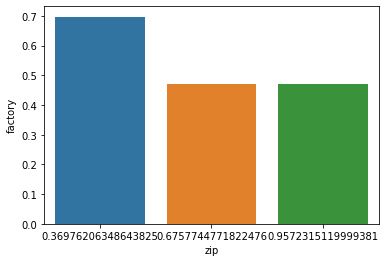

In [88]:
sns.barplot(x = "zip", y = "factory", data = fasla)

In [83]:
fasla.T

,0,1,2
zip,0.957232,0.675774,0.369762
factory,0.471387,0.472492,0.697459
warehouse,0.099260,0.305630,0.589240
retail,0.960886,0.741682,0.665210


In [85]:
fasla2 = pd.DataFrame([[1, "12345", "factory"], [2, '34567', "warehouse"], [3, '45678', "retail"]], columns = ["id", "zip", "type"])
fasla2

,id,zip,type
0,1,12345,factory
1,2,34567,warehouse
2,3,45678,retail


In [90]:
fasla_long = fasla.melt(id_vars ='zip', var_name="location_type", value_name="distance") 

<AxesSubplot:xlabel='zip', ylabel='distance'>

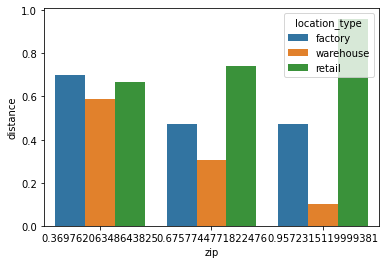

In [93]:
sns.barplot(x = "zip", y = "distance", hue="location_type" , data = fasla_long)